In [36]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import sklearn.linear_model

In [25]:
'''
Generate N 2d datapoints, around a random parabola, plus noise
'''
def genData(N,noise=1):
    line=np.random.randn(3) #random A,B,C for Ax^2+Bx+C=0
    xs=np.random.random(N)*20-10 #random points on x-axis between -10 and 10

    #for each of those points, calculate x^2,x,and 1, and add in some random
    #error
    data=np.asarray( [[x*x,x,1+noise*np.random.randn()] for x in xs] )
    ys=data@line #calculate resulting y value
    return xs,ys

'''
Calculate the line of best fit in original x,y space. This will be bad!
'''
def plotItLin(xs,ys):
    plt.plot(xs,ys,'.')
    data=np.ones((N,2))
    data[:,0]=xs
    w=linReg(data,ys)
    plt.plot([-10,10],np.array([[-10,1],[10, 1]])@w)
    plt.show()

'''
Fancy-shmancy drawing of points and plane of best fit in x,x^2 space
'''
def plot3D(xs,ys,data,w=None):
  fig=plt.figure()
  ax=Axes3D(fig)
  if w is not None:
    X=np.arange(-10,10)
    XSq=np.arange(0,100)
    plane=np.asarray([[xsq,x,1] for xsq in XSq for x in X])@w
    plane=plane.reshape((100,20))
    X,XSq=np.meshgrid(X,XSq)
    ax.plot_surface(X,XSq,plane,color="lightgray",shade=False,\
        alpha=.7)
  ax.scatter(data[:,1],data[:,0],ys)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$x^2$')
  ax.set_zlabel('$y$')
  plt.show()

'''
Draw all the stuff to explain regression in 3d space
'''
def plotItQuad(xs,ys):
  data=np.asarray( [[x*x, x, 1] for x in xs] )
  plot3D(xs,ys,data) #plot points in 3d space
  w=linReg(data,ys) #calculate the plane of best fit
  plot3D(xs,ys,data,w) #plot points and plane in 3d space

  #plot resulting parabola in original 2d space
  plt.plot(xs,ys,'.')
  allXs=np.linspace(-10,10)
  allXData=np.asarray([[x*x,x,1] for x in allXs])
  allYs=allXData@w
  plt.plot(allXs,allYs)
  plt.show()

'''
Let's add more monomial features! x^3, x^4, up to x^9
'''
def overFitIt(xs,ys):
  data=np.asarray( [[pow(x,i) for i in range(11)] for x in xs] )
  fig,axes=plt.subplots(3,3,sharex='col')
  curr=1
  allXs=np.linspace(-10,10)
  allXdata=np.asarray( [[pow(x,i) for i in range(11)] for x in allXs] )
  for row in range(3):
    for col in range(3):
      axes[row,col].plot(xs,ys,'.')
      w=linReg(data[:,:curr+1],ys)
      axes[row,col].plot(allXs,allXdata[:,:curr+1]@w)
      
      ypreds=data[:,:curr+1]@w
      err=(1/len(xs))*np.linalg.norm(ypreds-ys)
      axes[row,col].set_title("$E_{in}=%.4f$"%err)

      axes[row,col].set_yticklabels([])

      curr=curr+1
  plt.show()

def plotPoints(xs,ys):
    fig=px.scatter(x=xs,y=ys)
    fig.update_layout(width=700,height=500)
    fig.show()


In [3]:
N=25
noise=8

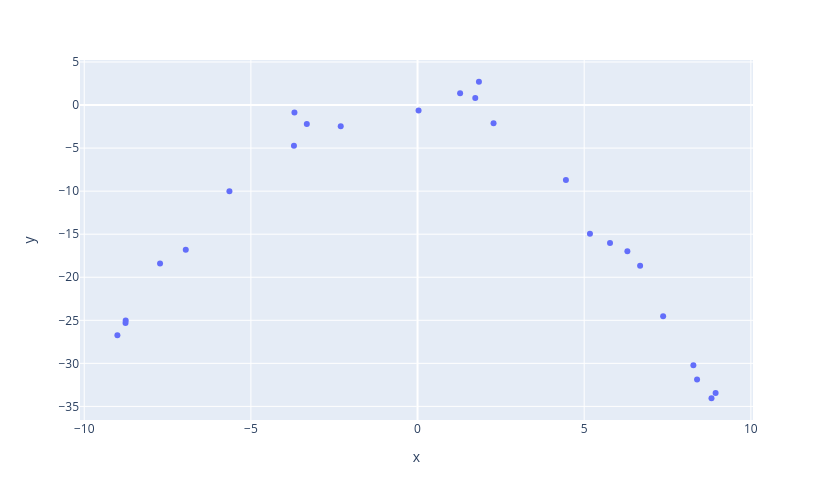

In [32]:
xs,ys=genData(N,noise=noise)
fig=px.scatter(x=xs,y=ys)
fig.update_layout(width=700,height=500)
fig.show()

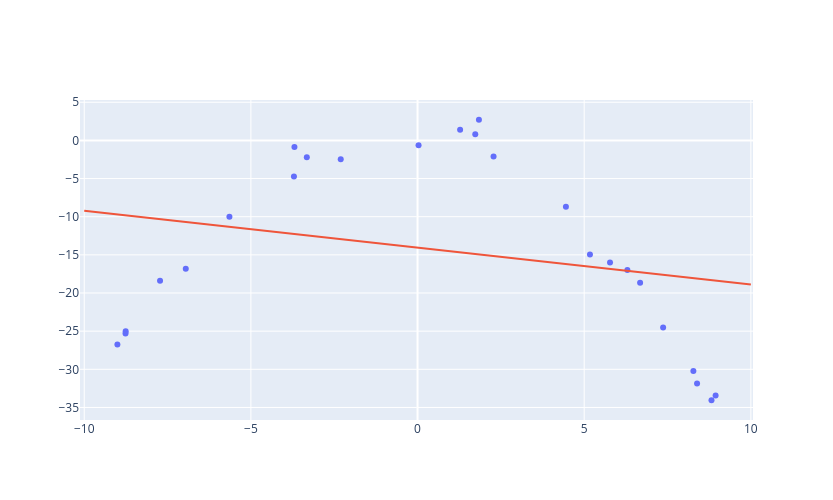

In [41]:
lr=sklearn.linear_model.Ridge(alpha=.0001)
lr.fit(xs.reshape(-1,1),ys)
linexs=np.linspace(-10,10)
lineys=linexs*lr.coef_[0]+lr.intercept_
scatter=go.Scatter(x=xs,y=ys,mode='markers',showlegend=False)
line=go.Scatter(x=linexs,y=lineys,mode='lines',showlegend=False)
fig=go.Figure(data=[scatter,line])
fig.update_layout(width=700,height=500)
fig.show()

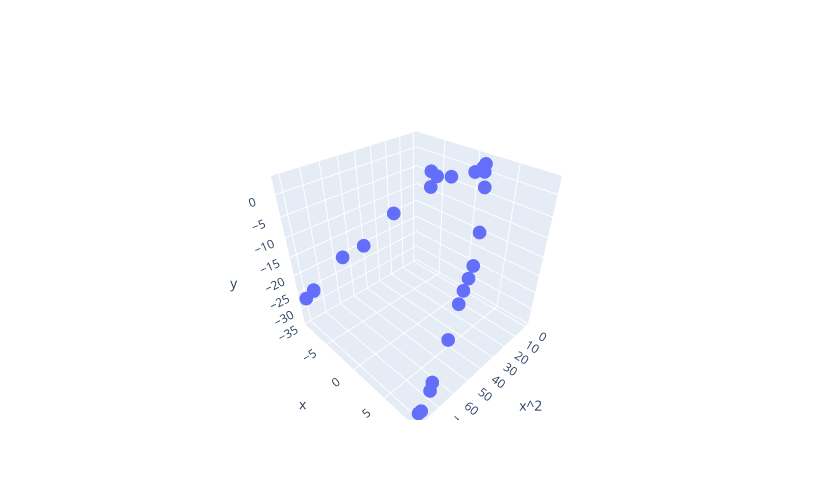

In [44]:
Phi=np.zeros((25,2))
Phi[:,0]=xs*xs
Phi[:,1]=xs

scat=go.Scatter3d(x=Phi[:,0],y=Phi[:,1],z=ys,mode='markers')
fig=go.Figure(data=scat)
fig.update_layout(scene=dict(xaxis_title='x^2',yaxis_title='x',zaxis_title='y'))
fig.update_layout(width=700,height=500)
fig.show()

[-0.39813604 -0.44686086]


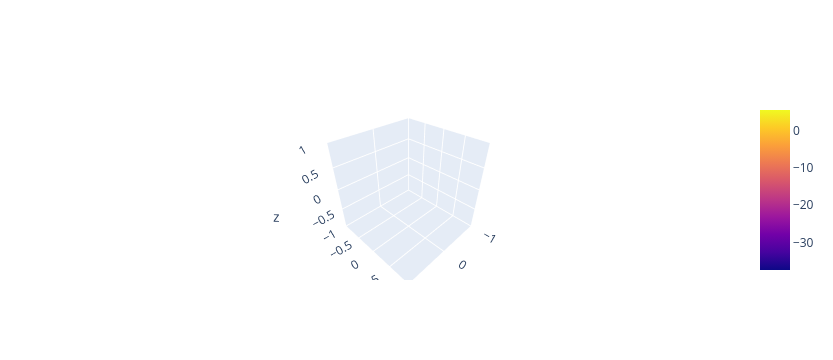

In [50]:
lr=sklearn.linear_model.Ridge(alpha=.0001)
lr.fit(Phi,ys)

scat=go.Scatter3d(x=Phi[:,0],y=Phi[:,1],z=ys,mode='markers')
xplane=np.linspace(0,85)
yplane=np.linspace(-10,10)
print(lr.coef_)
zplane=lr.coef_[0]*xplane+lr.coef_[1]*yplane+lr.intercept_
plane=go.Surface(x=xplane,y=yplane,z=zplane)
fig=go.Figure(data=[plane])
fig.show()